In [3]:
import pandas as pd

In [65]:
df_7 = pd.read_csv('./bases_datos/accesos_internet_fijo_hasta20171T_p1.csv')
df_8 = pd.read_csv('./bases_datos/accesos_internet_fijo_hasta20171T_p2.csv')
df_9 = pd.read_csv('./bases_datos/accesos_internet_fijo_hasta20171T_p3.csv')
df_1 = pd.read_csv('./bases_datos/accesos_internet_fijo_desde20172T_p1.csv')
df_2 = pd.read_csv('./bases_datos/accesos_internet_fijo_desde20172T_p2.csv')
df_3 = pd.read_csv('./bases_datos/accesos_internet_fijo_desde20172T_p3.csv')
df_4 = pd.read_csv('./bases_datos/accesos_internet_fijo_desde20172T_p4.csv')
df_5 = pd.read_csv('./bases_datos/accesos_internet_fijo_desde20172T_p5.csv')
df_6 = pd.read_csv('./bases_datos/accesos_internet_fijo_desde20172T_p6.csv')
df_internet_sucrp = pd.concat([df_1, df_2, df_3, df_4, df_5, df_6])

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_7536\3022981636.py:6: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df_3 = pd.read_csv('./bases_datos/accesos_internet_fijo_desde20172T_p3.csv')


In [66]:
df_internet_sucrp

,anno,trimestre,id_empresa,empresa,id_municipio,municipio,id_departamento,departamento,id_segmento,segmento,velocidad_efectiva_downstream,velocidad_efectiva_upstream,id_tecnologia,tecnologia,accesos,entry_id
0,2017,2,900217277,SYSTEL COMUNICACIONES CARTAGO S.A.S.,76147,CARTAGO,76,VALLE DEL CAUCA,104,Residencial - Estrato 4,1,"0,5",114,Otras tecnologías inalámbricas,7,1
1,2017,2,900217277,SYSTEL COMUNICACIONES CARTAGO S.A.S.,76147,CARTAGO,76,VALLE DEL CAUCA,101,Residencial - Estrato 1,2,1,114,Otras tecnologías inalámbricas,1,2
2,2017,2,900217277,SYSTEL COMUNICACIONES CARTAGO S.A.S.,76147,CARTAGO,76,VALLE DEL CAUCA,107,Corporativo,"0,8","0,5",114,Otras tecnologías inalámbricas,1,3
3,2017,2,900217277,SYSTEL COMUNICACIONES CARTAGO S.A.S.,76147,CARTAGO,76,VALLE DEL CAUCA,107,Corporativo,"2,8",2,114,Otras tecnologías inalámbricas,13,4
4,2017,2,900217277,SYSTEL COMUNICACIONES CARTAGO S.A.S.,76147,CARTAGO,76,VALLE DEL CAUCA,104,Residencial - Estrato 4,"1,5","0,7",114,Otras tecnologías inalámbricas,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5576,2022,1,901397346,AJ GLOBAL PROYECTOS NET S.A.S.,15407,VILLA DE LEYVA,15,BOYACÁ,107,Corporativo,40,20,104,WiFi,2,1505577
5577,2022,1,901397346,AJ GLOBAL PROYECTOS NET S.A.S.,15776,SUTAMARCHÁN,15,BOYACÁ,102,Residencial - Estrato 2,15,"7,5",104,WiFi,2,1505578
5578,2022,1,901397346,AJ GLOBAL PROYECTOS NET S.A.S.,15407,VILLA DE LEYVA,15,BOYACÁ,102,Residencial - Estrato 2,5,"2,5",104,WiFi,10,1505579
5579,2022,1,901397346,AJ GLOBAL PROYECTOS NET S.A.S.,15407,VILLA DE LEYVA,15,BOYACÁ,107,Corporativo,30,15,104,WiFi,2,1505580


In [68]:
# Crear una columna con los datos temporales
df_internet_sucrp['datetime']=  df_internet_sucrp.apply(lambda row: f'{row.anno}/{str(row.trimestre).zfill(2)}', axis=1)

In [69]:
# Organizar el dataframe
# lista_columnas = list(df_tv_sucrp.columns)[3:-1]
# lista_columnas.insert(0,'datetime')
lista_columnas = ['datetime', 'id_empresa', 'empresa', 'id_departamento', 'departamento', 'id_municipio', 'municipio', 'accesos']
df_internet_sucrp = df_internet_sucrp[lista_columnas]

In [70]:
# Eliminar entradas que no tienen datos por departamento
df_internet_sucrp = df_internet_sucrp.dropna(subset=['departamento', 'accesos'])
# Eliminar entradas con suscriptores = 0
df_internet_sucrp = df_internet_sucrp[df_internet_sucrp.accesos != 0]
df_internet_sucrp.reset_index(drop=True, inplace=True)

In [71]:
df_internet_sucrp

,datetime,id_empresa,empresa,id_departamento,departamento,id_municipio,municipio,accesos
0,2017/02,900217277,SYSTEL COMUNICACIONES CARTAGO S.A.S.,76,VALLE DEL CAUCA,76147,CARTAGO,7
1,2017/02,900217277,SYSTEL COMUNICACIONES CARTAGO S.A.S.,76,VALLE DEL CAUCA,76147,CARTAGO,1
2,2017/02,900217277,SYSTEL COMUNICACIONES CARTAGO S.A.S.,76,VALLE DEL CAUCA,76147,CARTAGO,1
3,2017/02,900217277,SYSTEL COMUNICACIONES CARTAGO S.A.S.,76,VALLE DEL CAUCA,76147,CARTAGO,13
4,2017/02,900217277,SYSTEL COMUNICACIONES CARTAGO S.A.S.,76,VALLE DEL CAUCA,76147,CARTAGO,2
...,...,...,...,...,...,...,...,...
1505576,2022/01,901397346,AJ GLOBAL PROYECTOS NET S.A.S.,15,BOYACÁ,15407,VILLA DE LEYVA,2
1505577,2022/01,901397346,AJ GLOBAL PROYECTOS NET S.A.S.,15,BOYACÁ,15776,SUTAMARCHÁN,2
1505578,2022/01,901397346,AJ GLOBAL PROYECTOS NET S.A.S.,15,BOYACÁ,15407,VILLA DE LEYVA,10
1505579,2022/01,901397346,AJ GLOBAL PROYECTOS NET S.A.S.,15,BOYACÁ,15407,VILLA DE LEYVA,2


In [72]:
datetime_list = df_internet_sucrp.datetime.unique()
dpto_list = df_internet_sucrp.departamento.unique()

In [73]:
df_internet_sucrp_depto_operador= df_internet_sucrp.groupby(['datetime', 'departamento', 'empresa'])['accesos'].sum()
df_internet_sucrp_depto_operador.to_csv('./bases_datos/suscriptores_internet_dpto_empresa.csv')

In [74]:
df_internet_sucrp_depto_operador = pd.read_csv('./bases_datos/suscriptores_internet_dpto_empresa.csv')
df_internet_sucrp_depto_operador = df_internet_sucrp_depto_operador.sort_values(by=['datetime', 'departamento','accesos'], ascending=[True, True, False])
df_internet_sucrp_depto_operador

,datetime,departamento,empresa,accesos
1,2017/02,AMAZONAS,COLOMBIA TELECOMUNICACIONES S.A. E.S.P.,341
0,2017/02,AMAZONAS,AXESAT S.A.,54
3,2017/02,AMAZONAS,SKYNET DE COLOMBIA S.A.S. E.S.P,22
2,2017/02,AMAZONAS,IFX NETWORKS COLOMBIA S.A.S.,4
4,2017/02,AMAZONAS,TELECOMMUNICATIONS ADVANCE GROUP S.A.S.,1
...,...,...,...,...
23245,2022/01,VICHADA,AZTECA COMUNICACIONES COLOMBIA S.A.S,8
23251,2022/01,VICHADA,SPEEDCAST SUCURSAL COLOMBIA,5
23246,2022/01,VICHADA,BANSAT S.A.,2
23248,2022/01,VICHADA,EMPRESA DE TELECOMUNICACIONES DE BOGOTA S.A. ESP,2


In [75]:
df_internet_sucrp_depto= df_internet_sucrp_depto_operador.groupby(['datetime', 'departamento'])['accesos'].sum()
df_internet_sucrp_depto.to_csv('./bases_datos/suscriptores_internet_dpto.csv')

In [76]:
df_tv_sucrp_dpto = pd.read_csv('./bases_datos/suscriptores_internet_dpto.csv')
df_tv_sucrp_dpto = df_tv_sucrp_dpto.sort_values(by=['datetime', 'accesos'], ascending=[True, False])
df_tv_sucrp_dpto

,datetime,departamento,accesos
5,2017/02,BOGOTÁ D.C.,1776759
1,2017/02,ANTIOQUIA,1074066
31,2017/02,VALLE DEL CAUCA,685493
15,2017/02,CUNDINAMARCA,334699
28,2017/02,SANTANDER,326858
...,...,...,...
646,2022/01,GUAVIARE,2312
629,2022/01,AMAZONAS,1141
661,2022/01,VICHADA,1079
645,2022/01,GUAINÍA,834


In [80]:
new_index = ['AMAZONAS', 'ANTIOQUIA', 'ARAUCA', 'ATLÁNTICO', 'BOLÍVAR', 'BOYACÁ', 'CALDAS', 'CAQUETA', 'CASANARE', 'CAUCA', 'CESAR', 'CHOCÓ', 'CÓRDOBA',
             'CUNDINAMARCA', 'BOGOTÁ D.C.', 'GUAINÍA', 'GUAVIARE', 'HUILA', 'LA GUAJIRA', 'MAGDALENA', 'META', 'NARIÑO', 'NORTE DE SANTANDER', 'PUTUMAYO', 'QUINDÍO',
             'RISARALDA', 'ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA CATALINA', 'SANTANDER', 'SUCRE', 'TOLIMA', 'VALLE DEL CAUCA', 'VAUPÉS', 'VICHADA']

In [81]:
df = pd.DataFrame(columns=datetime_list)
list_temp = list()
for dpto_name in dpto_list:
    df_dpto_temp = df_tv_sucrp_dpto[df_tv_sucrp_dpto['departamento'] == dpto_name].drop(['departamento'], axis=1).rename(columns = {'accesos':dpto_name}).set_index(['datetime']).T
    df = pd.concat([df, df_dpto_temp])
df.sort_index(inplace=True)
df = df.fillna(0)
df = df.loc[new_index]
df

,2017/02,2017/03,2017/04,2018/01,2018/02,2018/03,2018/04,2019/01,2019/02,2019/03,2019/04,2020/01,2020/02,2020/03,2020/04,2021/01,2021/02,2021/03,2021/04,2022/01
AMAZONAS,422,423,408,391,567,640,930,1298,1243,1332,1290,1382,1365,1438,1431,1679,1436,1318,1251,1141
ANTIOQUIA,1074066,1090819,1098843,1113650,1127759,1149039,1164120,1187713,1198328,1211906,1232702,1257995,1322352,1345905,1362792,1403203,1458830,1482908,1509138,1528588
ARAUCA,9242,9580,10647,11105,11263,11260,11272,12948,14612,15126,14526,16447,17688,21560,20273,20980,21904,22685,24912,20244
ATLÁNTICO,314991,322437,328389,335464,338205,343197,346822,329666,343938,351804,354675,362839,376574,385913,391057,407590,421542,430057,425332,435560
BOLÍVAR,174788,174669,177184,180168,183550,183812,186967,191419,194076,198475,185788,191306,197383,198025,197095,204612,217865,225168,233316,227251
BOYACÁ,102904,103228,105391,108764,111668,114666,116210,120297,121760,124919,116349,120739,125176,132694,137564,146275,146067,148028,154752,153748
CALDAS,117090,118765,119291,120931,122103,121484,123072,125136,127633,127296,121706,129564,137568,142560,152813,155294,157593,155408,155106,153038
CAQUETA,20312,22299,19463,19190,20378,21443,22595,22874,22304,26741,26931,28707,30875,31998,28982,32365,32017,34203,35620,32079
CASANARE,32173,32855,33843,34136,34762,34124,33711,35957,35451,36832,38138,42087,46074,47410,47639,49441,47882,51790,50479,42844
CAUCA,63681,65006,65547,69939,70370,75890,75879,75130,80819,76234,75525,77510,87682,83036,84164,100076,103443,95784,92191,89547


In [82]:
df.T.to_csv('././bases_datos/suscriptores_internet_dpto.v2.csv')
df.T

,AMAZONAS,ANTIOQUIA,ARAUCA,ATLÁNTICO,BOLÍVAR,BOYACÁ,CALDAS,CAQUETA,CASANARE,CAUCA,...,PUTUMAYO,QUINDÍO,RISARALDA,"ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA CATALINA",SANTANDER,SUCRE,TOLIMA,VALLE DEL CAUCA,VAUPÉS,VICHADA
2017/02,422,1074066,9242,314991,174788,102904,117090,20312,32173,63681,...,10897,87383,145637,4233,326858,46906,147894,685493,64,1011
2017/03,423,1090819,9580,322437,174669,103228,118765,22299,32855,65006,...,11435,89604,146913,4249,331507,45844,140366,698081,63,1016
2017/04,408,1098843,10647,328389,177184,105391,119291,19463,33843,65547,...,12200,90741,149943,4203,329803,47468,147084,707051,65,2217
2018/01,391,1113650,11105,335464,180168,108764,120931,19190,34136,69939,...,12772,92188,162303,4197,334159,48660,152223,719755,68,1520
2018/02,567,1127759,11263,338205,183550,111668,122103,20378,34762,70370,...,13534,93886,165341,4215,318321,51699,153989,731687,62,1017
2018/03,640,1149039,11260,343197,183812,114666,121484,21443,34124,75890,...,14645,94477,167548,4201,321125,51675,152342,741593,60,903
2018/04,930,1164120,11272,346822,186967,116210,123072,22595,33711,75879,...,15553,97766,168549,4121,324351,53645,153980,749987,63,936
2019/01,1298,1187713,12948,329666,191419,120297,125136,22874,35957,75130,...,11036,99031,173184,4177,329265,53428,157890,763692,63,1322
2019/02,1243,1198328,14612,343938,194076,121760,127633,22304,35451,80819,...,17081,99862,175933,4263,330025,53258,158875,768930,47,1291
2019/03,1332,1211906,15126,351804,198475,124919,127296,26741,36832,76234,...,11291,102379,178076,4049,339143,53968,161315,779626,88,1331


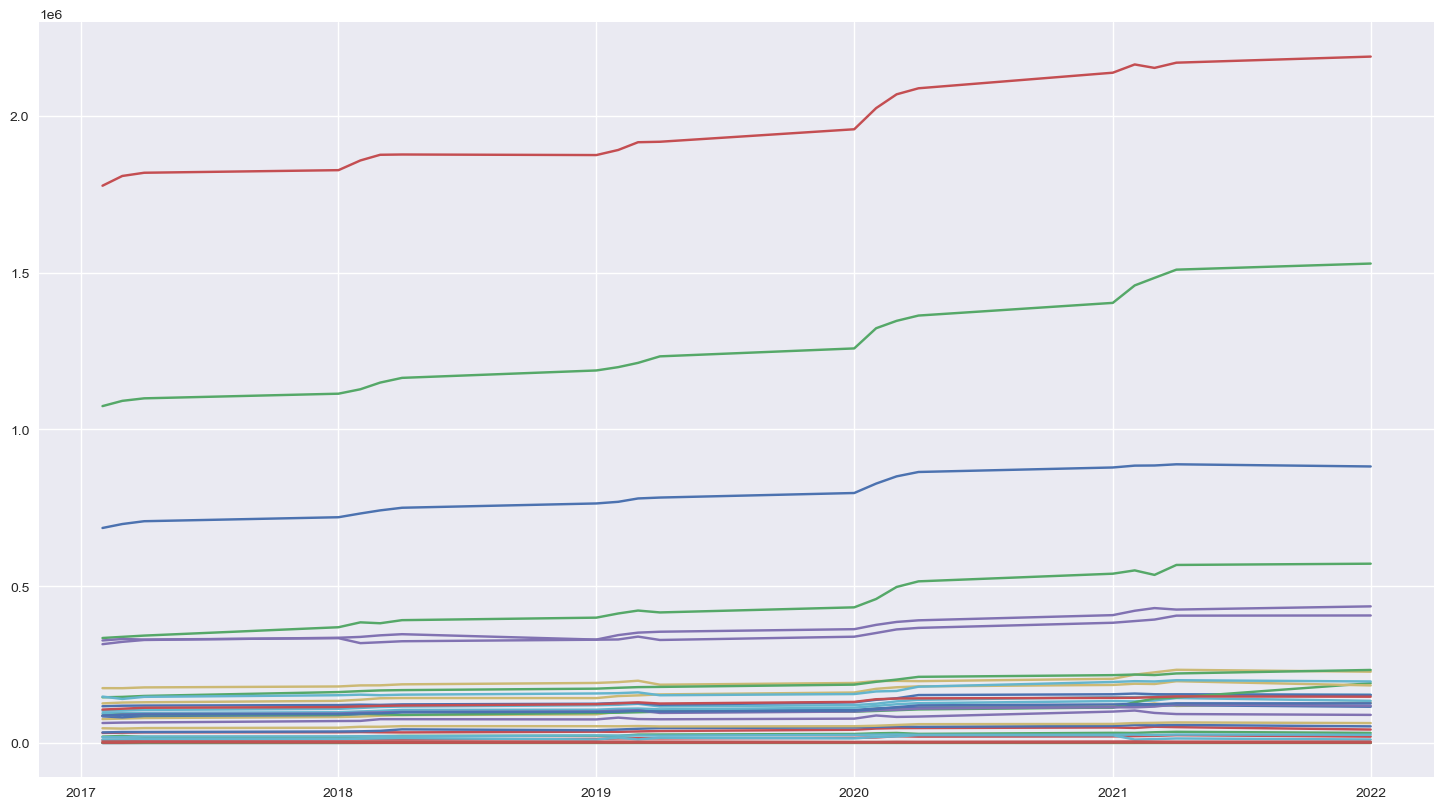

In [89]:
import datetime as dt
import matplotlib.pyplot as plt
plt.style.use('seaborn')

dates = [dt.datetime.strptime(date, "%Y/%m") for date in datetime_list]

plt.figure(figsize=(18,10), dpi=100)
for dpto in new_index[:]:
    y_values = df.loc[dpto]
    plt.plot_date(dates, y_values, '-')

plt.show()